In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math
# importing warnings for numoy module as I imported thid 2 times
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel(r"C:\Users\ayshf\Downloads\default_Data (1).xlsx")
# importing excel file in read mode

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
len(df[df.duplicated()])
# finding duplicates

0

In [5]:
df.isnull().sum()
# finding null values

ID                 0
LIMIT_BAL          0
SEX                0
EDUCATION          0
MARRIAGE           0
AGE                0
PAY_0              0
PAY_2              0
PAY_3              0
PAY_4              0
PAY_5              0
PAY_6              0
BILL_AMT1          0
BILL_AMT2          0
BILL_AMT3          0
BILL_AMT4          0
BILL_AMT5          0
BILL_AMT6          0
PAY_AMT1           0
PAY_AMT2           0
PAY_AMT3           0
PAY_AMT4           0
PAY_AMT5           0
PAY_AMT6           0
default payment    0
dtype: int64

In [6]:
df.rename(columns={'default payment' : 'IsDefaulter'}, inplace=True)
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)
# using implace = True for saving the changes
# renaming for readability

In [7]:
#replacing values with there labels
df.replace({'SEX': {1 : 'Male', 2 : 'Female'}}, inplace=True)
df.replace({'EDUCATION' : {1 : 'Graduate School', 2 : 'University', 3 : 'High School', 4 : 'Others'}}, inplace=True)
df.replace({'MARRIAGE' : {1 : 'Married', 2 : 'Single', 3 : 'Others'}}, inplace = True)
df.replace({'IsDefaulter' : {1 : 'Yes', 0 : 'No'}}, inplace = True)

In [8]:
#Counting number of defaulters 'yes' for a defaulter = 233
df['IsDefaulter'].value_counts()

IsDefaulter
No     23364
Yes     6636
Name: count, dtype: int64

In [9]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,Yes
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,Yes
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,No
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,No
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,No


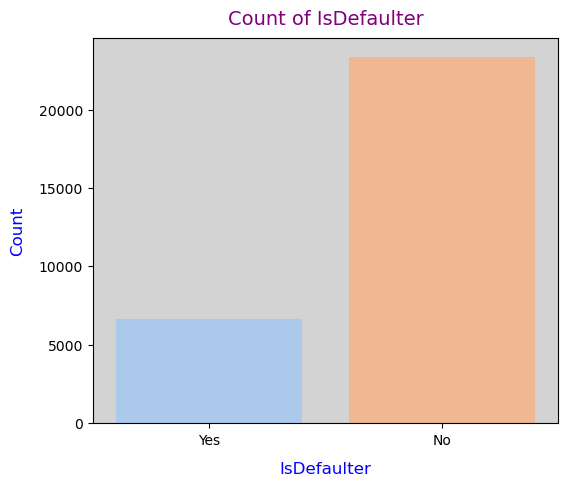

In [10]:
# Number of defaulters and non defaulters we have
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='IsDefaulter', data=df, palette='pastel')
ax.set_xlabel('IsDefaulter', fontsize=12, color='blue', labelpad=10)
ax.set_ylabel('Count', fontsize=12, color='blue', labelpad=10)
ax.set_title('Count of IsDefaulter', fontsize=14, color='purple', pad=10)
ax.set_facecolor('lightgrey')
plt.show()


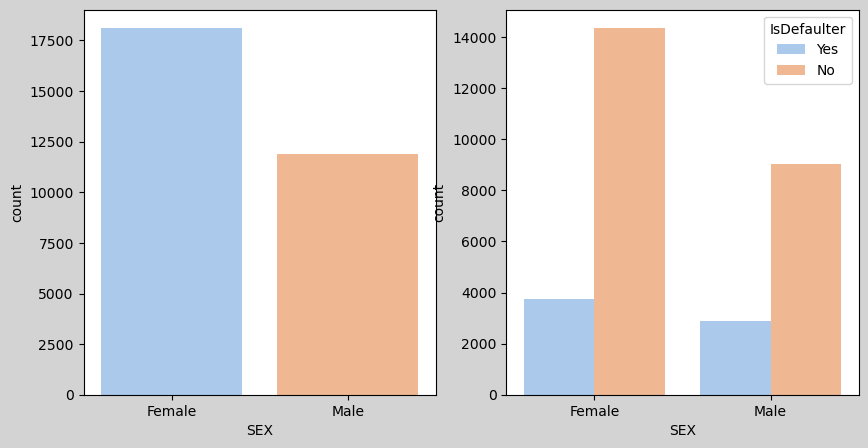

In [11]:
# Number of male and female defaulters
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
fig.set_facecolor('lightgrey')  # Set background color of the figure

sns.countplot(x='SEX', ax=axes[0], data=df, palette='pastel')
sns.countplot(x='SEX', hue='IsDefaulter', ax=axes[1], data=df, palette='pastel')
plt.show()


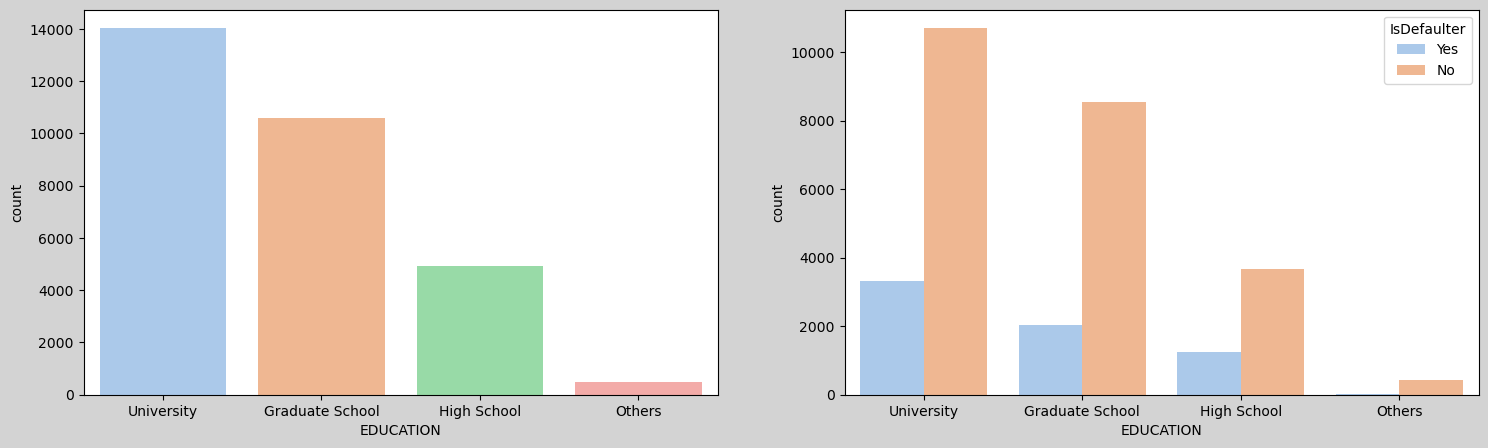

In [12]:
# defaulters based on education
fig, axes = plt.subplots(ncols=2, figsize=(18, 5))
fig.set_facecolor('lightgrey')  # Set background color of the figure
sns.countplot(x='EDUCATION', ax=axes[0], data=df, palette='pastel')
sns.countplot(x='EDUCATION', hue='IsDefaulter', ax=axes[1], data=df, palette='pastel')
plt.show()


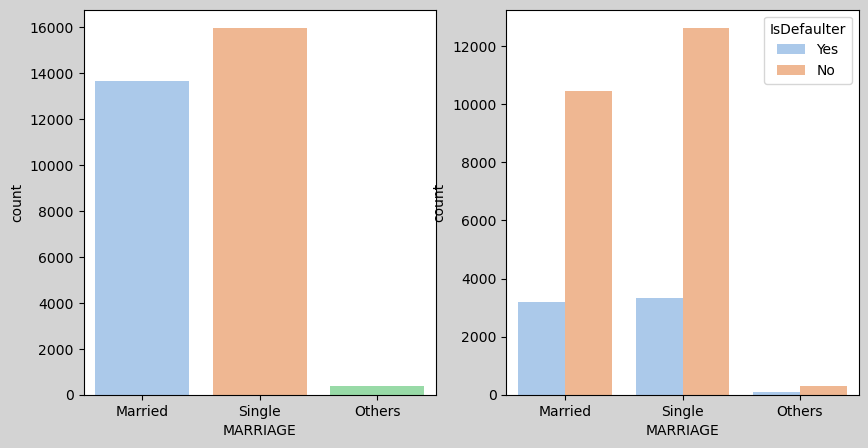

In [13]:
# defaulters based on marriage
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
fig.set_facecolor('lightgrey')  # Set background color of the figure
sns.countplot(x='MARRIAGE', ax=axes[0], data=df, palette='pastel')
sns.countplot(x='MARRIAGE', hue='IsDefaulter', ax=axes[1], data=df, palette='pastel')
plt.show()


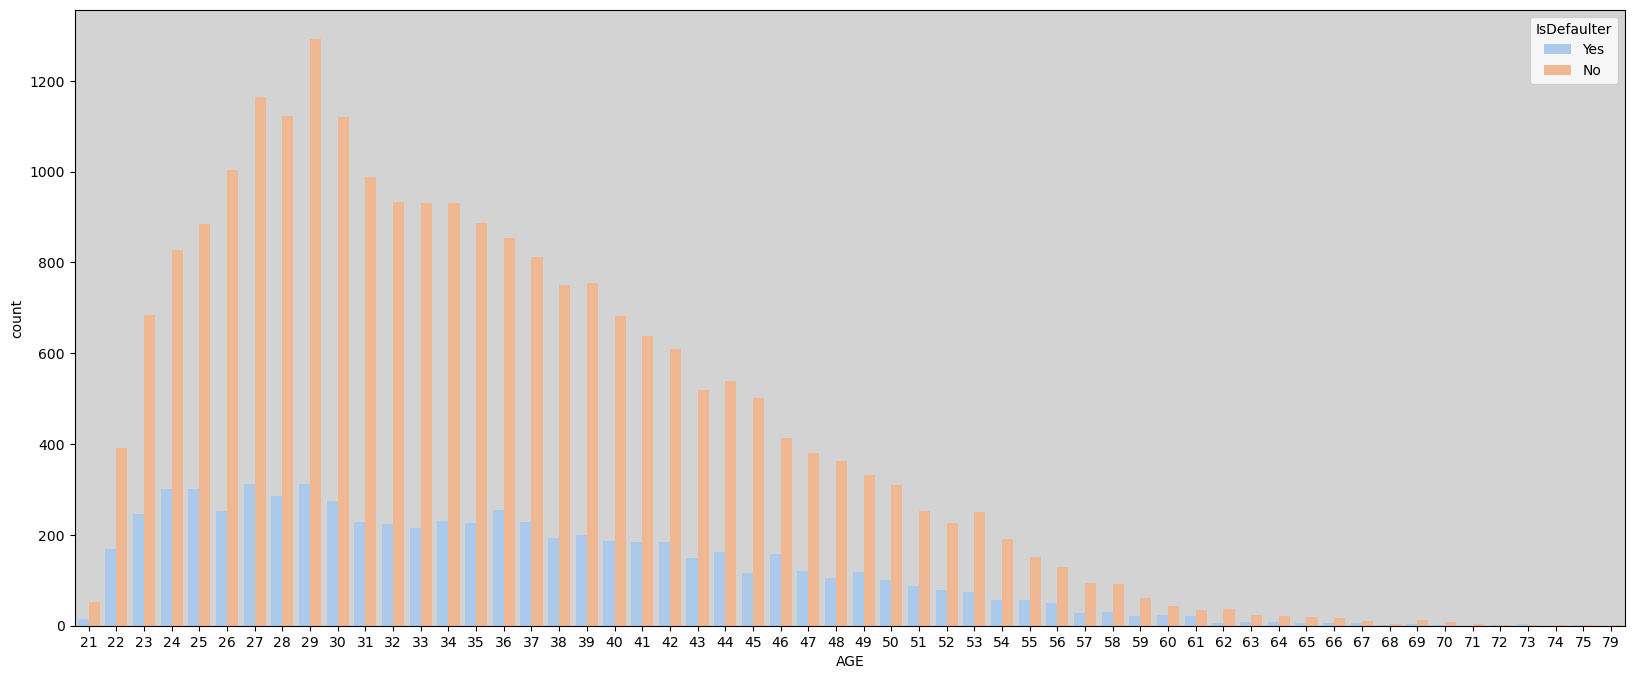

In [14]:
# defaulters based on age
plt.figure(figsize=(20, 8))
plt.gca().set_facecolor('lightgrey')  # Set background color of the plot
sns.countplot(x='AGE', hue='IsDefaulter', data=df, palette='pastel')
plt.show()


In [15]:
#for counting only numeric values 
df.corr(numeric_only=True)

,ID,LIMIT_BAL,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,BILL_AMT_SEPT,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
ID,1.000000,0.026179,0.018678,0.051722,0.025860,0.025643,0.029568,0.026372,0.027849,0.019389,...,0.024354,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000
LIMIT_BAL,0.026179,1.000000,0.144713,0.125978,0.117524,0.106298,0.099564,0.093851,0.073889,0.285430,...,0.283236,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595
AGE,0.018678,0.144713,1.000000,0.043696,0.043672,0.043038,0.045112,0.044308,0.028927,0.056239,...,0.053710,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478
PAY_SEPT,0.051722,0.125978,0.043696,1.000000,0.787579,0.669667,0.610590,0.575793,0.526341,-0.137431,...,-0.123016,-0.120762,-0.111999,-0.107439,-0.014507,0.007976,-0.008966,0.004628,0.007002,0.005055
PAY_AUG,0.025860,0.117524,0.043672,0.787579,1.000000,0.797131,0.687111,0.629764,0.572816,-0.183791,...,-0.174157,-0.170150,-0.159310,-0.153973,-0.082926,-0.020131,-0.035663,-0.016565,-0.022335,-0.027885
PAY_JUL,0.025643,0.106298,0.043038,0.669667,0.797131,1.000000,0.809717,0.701874,0.632353,-0.191762,...,-0.203721,-0.195089,-0.183138,-0.175622,-0.066679,-0.072576,-0.042184,-0.024659,-0.028681,-0.030782
PAY_JUN,0.029568,0.099564,0.045112,0.610590,0.687111,0.809717,1.000000,0.829563,0.704289,-0.194601,...,-0.215168,-0.214570,-0.203033,-0.193931,-0.062127,-0.055910,-0.087214,-0.045047,-0.036804,-0.033123
PAY_MAY,0.026372,0.093851,0.044308,0.575793,0.629764,0.701874,0.829563,1.000000,0.817055,-0.188803,...,-0.207820,-0.219604,-0.217105,-0.205799,-0.057479,-0.041760,-0.067796,-0.094134,-0.041138,-0.036853
PAY_APR,0.027849,0.073889,0.028927,0.526341,0.572816,0.632353,0.704289,0.817055,1.000000,-0.191510,...,-0.212862,-0.222003,-0.227323,-0.224824,-0.060942,-0.052789,-0.064714,-0.074024,-0.101210,-0.051728
BILL_AMT_SEPT,0.019389,0.285430,0.056239,-0.137431,-0.183791,-0.191762,-0.194601,-0.188803,-0.191510,1.000000,...,0.892279,0.860272,0.829779,0.802650,0.140277,0.099355,0.156887,0.158303,0.167026,0.179341


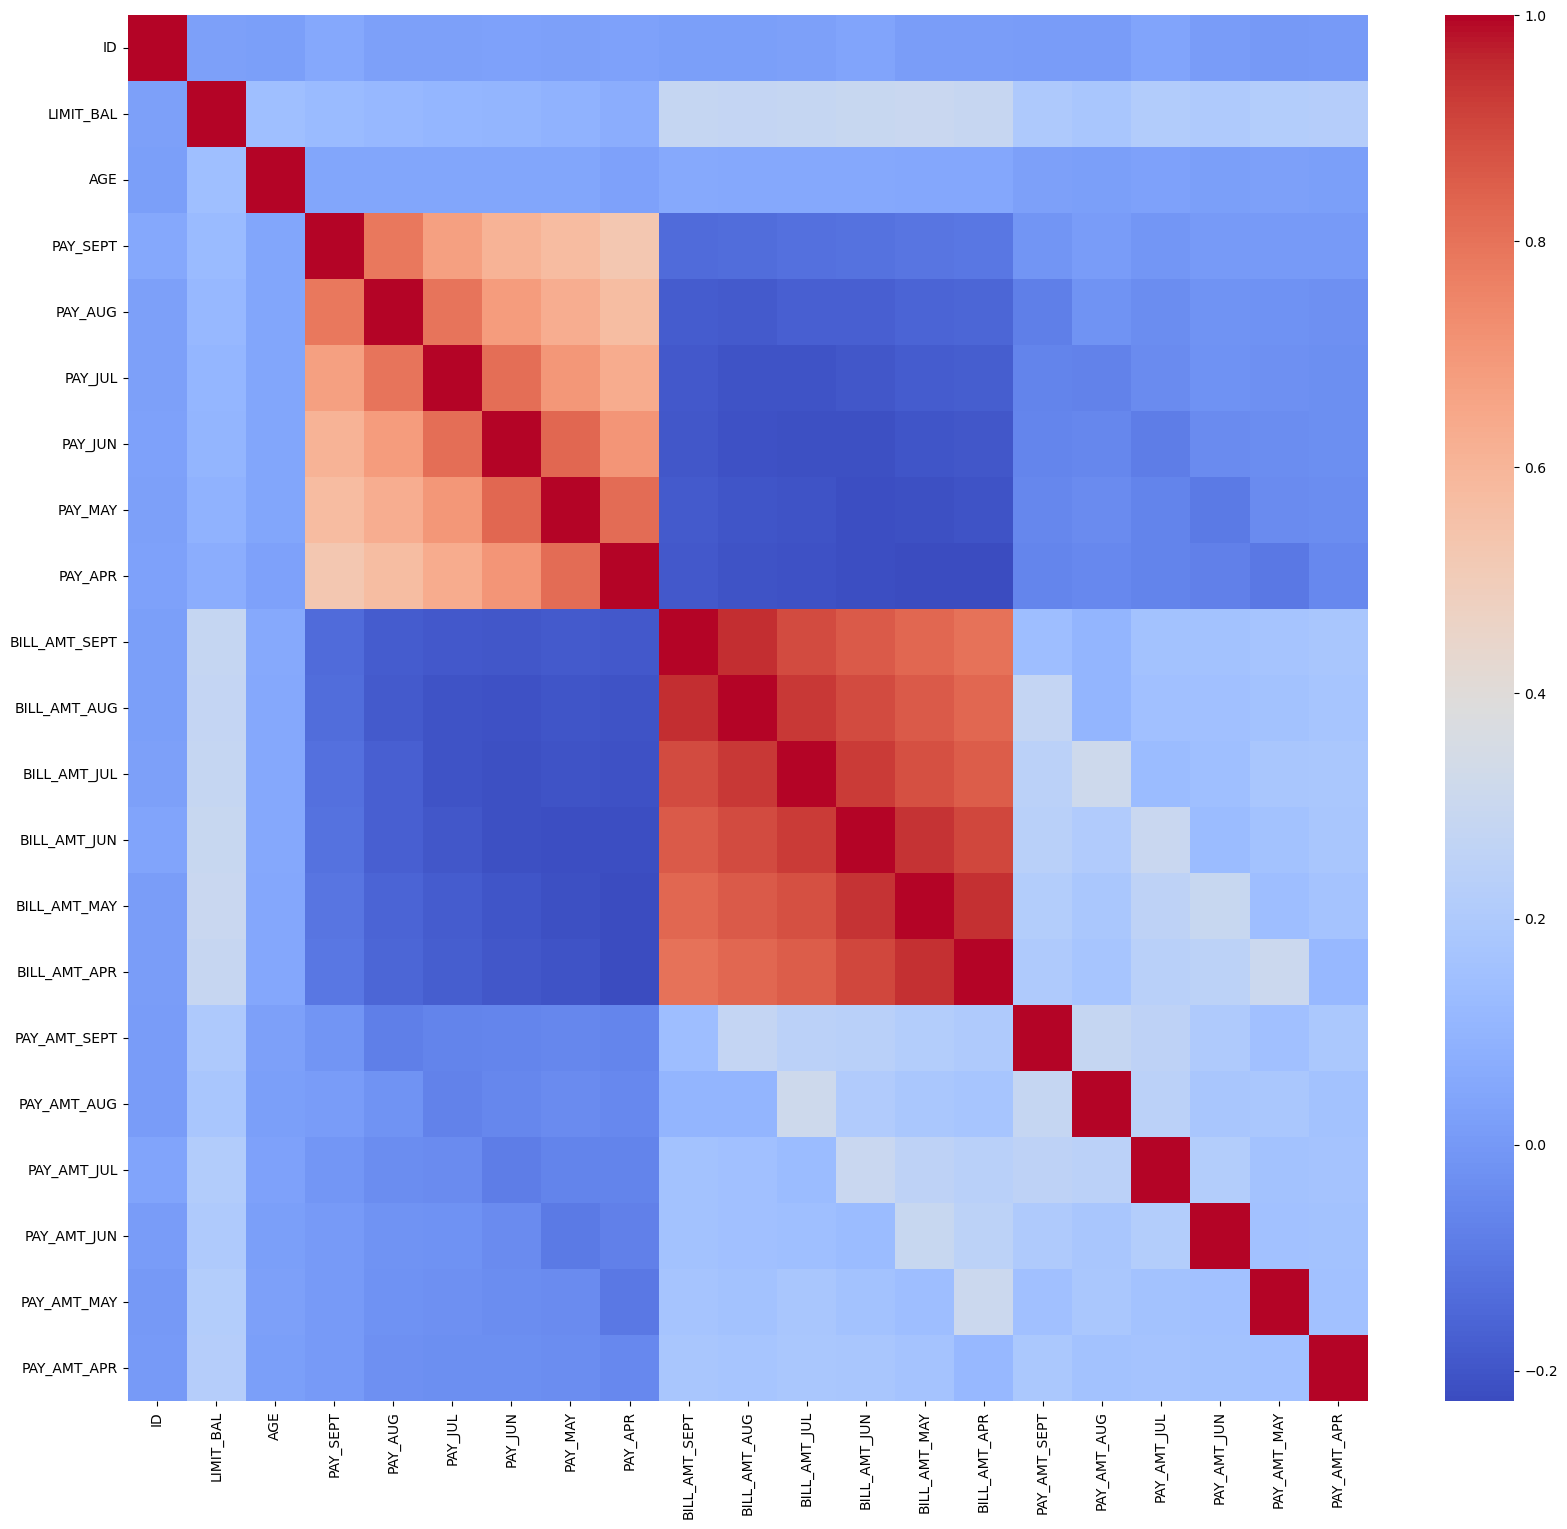

In [16]:
plt.figure(figsize=(20, 18))
plt.gca().set_facecolor('lightgrey')  # Set background color of the plot
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.show()


In [17]:
#Label encoding 
encode_num = {"SEX":{"Female":0,"Male":1}, "IsDefaulter":{"Yes":1,"No":0}}
df=df.replace(encode_num)

In [18]:
#creating dummy variables
# for getting values in binary form
df = pd.get_dummies(df, columns=['EDUCATION','MARRIAGE']) 

In [19]:
#creating dummy variables by droping first variable
# creating binary variables which represets presece of value in the original column and absense for 0
# dropping first for avoid unstable predictions
df = pd.get_dummies(df, columns=['PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR'], drop_first = True )

In [21]:
#importing SMOTE to handle class imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df[(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter')], df['IsDefaulter'])

print('Original unbalanced dataset shape', len(df))
print('Resampled balanced dataset shape', len(y_smote))

Original unbalanced dataset shape 30000
Resampled balanced dataset shape 46728


In [22]:
#creating new dataframe from balanced dataset after SMOTE
balanced_df = pd.DataFrame(x_smote, columns=list(i for i in list(df.describe(include='all').columns) if i != 'IsDefaulter'))

In [23]:
#adding target variable to new created dataframe
balanced_df['IsDefaulter'] = y_smote

In [24]:
balanced_df['IsDefaulter'].value_counts()

IsDefaulter
1    23364
0    23364
Name: count, dtype: int64

In [25]:
#removing feature ID from dataset (useless)
balanced_df.drop('ID',axis = 1, inplace = True)

In [34]:
#seperating dependant and independant variabales
# x have all columns education, age, marital status, gender
# y have is_defaulter column
X = balanced_df[(list(i for i in list(balanced_df.describe(include='all').columns) if i != 'IsDefaulter'))]
y = balanced_df['IsDefaulter']

In [27]:
#importing libraries for data transformation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [28]:
#importing libraries for splitting data into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, stratify=y)

In [29]:
#importing logistic regression and evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score , confusion_matrix# roc_auc_score, , roc_curve, auc

In [30]:
#fitting data into Logistic Regression
logi = LogisticRegression(fit_intercept=True, max_iter=10000)
logi.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [31]:
#class prediction of y
y_pred_logi = logi.predict(X_test)
y_train_pred_logi=logi.predict(X_train)

In [32]:
#getting all score for logistic regression
train_accuracy_logi = round(accuracy_score(y_train_pred_logi,y_train), 3)
accuracy_logi = round(accuracy_score(y_pred_logi,y_test), 3)
precision_score_logi = round(precision_score(y_pred_logi,y_test), 3)
recall_score_logi = round(recall_score(y_pred_logi,y_test), 3)
f1_score_logi = round(f1_score(y_pred_logi,y_test), 3)
#roc_score_logi = round(roc_auc_score(y_pred_logi,y_test), 3)

print("The accuracy on train data is ", train_accuracy_logi)
print("The accuracy on test data is ", accuracy_logi)
print("The precision on test data is ", precision_score_logi)
print("The recall on test data is ", recall_score_logi)
print("The f1 on test data is ", f1_score_logi)
#print("The roc_score on test data is ", roc_score_logi)

The accuracy on train data is  0.842
The accuracy on test data is  0.844
The precision on test data is  0.781
The recall on test data is  0.894
The f1 on test data is  0.833


[[4239  434]
 [1025 3648]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

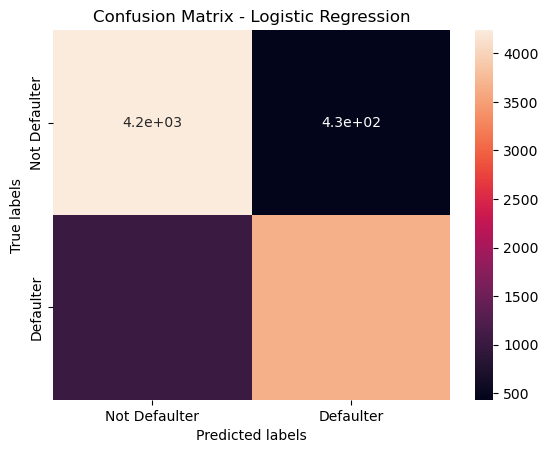

In [33]:
#Confusion matrix
labels = ['Not Defaulter', 'Defaulter']
cm_logi = confusion_matrix(y_test, y_pred_logi )
print(cm_logi)

#plot confusion matrix
ax= plt.subplot()
sns.heatmap(cm_logi, annot=True, ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)